In [14]:
from sklearn.decomposition import PCA
import plotly.io as pio
import plotly.graph_objs as go
import numpy as np
import torch
import os
from tqdm import tqdm
from common import _get_model, create_testloader, LOSS_FUNC

DEFAULT_GRID_SIZE = 50
DEFAULT_BATCH_SIZE = 128




def set_weights(model, weights):
    weight_dict = {}
    idx = 0
    for key, param in model.state_dict().items():
        size = int(np.prod(param.shape))
        weight_dict[key] = torch.tensor(weights[idx : idx + size]).view(param.shape)
        idx += size

    model.load_state_dict(weight_dict)
    return model


In [57]:
loaded_weights_np = np.load("fashion_mnist_async_4_100_0005_00_32_6_SGD_spe3_val_weights.npy")
weights = loaded_weights_np[0]
weights.shape

(61706,)

In [15]:
batch_size = DEFAULT_BATCH_SIZE
subfolder = ""
grid_size = 20
path_grid_losses = ""
path_grid_xx = ""
path_grid_yy = ""
grid_save=True

In [37]:
async_m00_model = "fashion_mnist_async_4_100_0005_00_32_6_SGD_spe3_val_model.pt"
classic_model = async_m00_model

async_m00_weights= "fashion_mnist_async_4_100_0005_00_32_6_SGD_spe3_val_weights.npy"
async_m50_weights= "fashion_mnist_async_4_100_0005_05_32_6_SGD_spe3_val_weights.npy"
async_m90_weights= "fashion_mnist_async_4_100_0005_09_32_6_SGD_spe3_val_weights.npy"
async_m95_weights= "fashion_mnist_async_4_100_0005_095_32_6_SGD_spe3_val_weights.npy"
#async_m99_weights= "fashion_mnist_async_4_100_0005_099_32_6_SGD_spe3_val_weights.npy"
#async_alr_weights= "fashion_mnist_async_4_100_0001_09_32_6_ADAM_spe3_val_weights.npy"

#weights_paths = [classic_weights, async_m00_weights, async_m50_weights, async_m90_weights, async_m95_weights, async_m99_weights, async_alr_weights,]
#weights_paths = [classic_weights, async_m00_weights, async_m50_weights, async_m90_weights, async_m95_weights, async_m99_weights,]
#weights_paths = [async_m00_weights, async_m50_weights, async_m90_weights, async_m95_weights, async_m99_weights, async_alr_weights,]
weights_paths = [async_m00_weights, async_m50_weights, async_m90_weights, async_m95_weights, ]
loaded_weights_np = []
for wp in weights_paths:
    loaded_weights_np.append(np.load(wp))
    if "classic" in wp:
        print(f"Saved weights shape: {loaded_weights_np[-1].shape}")
#%%
# perform PCA on the classic weights loaded_weights_np[0], remember the transformation to apply it to the other saved weights
pca = PCA(n_components=2)

# Convert the 3D list to a NumPy array
matrix_array = np.array(loaded_weights_np)
# Reshape the array to combine the matrices horizontally
combined_matrix = np.vstack(matrix_array)
pca.fit(combined_matrix)

PCA(n_components=2)

In [31]:
matrix_array.shape

(4, 18, 61706)

In [29]:
matrix_array.shape

(4, 18, 61706)

In [32]:
combined_matrix.shape

(72, 61706)

In [39]:
print(pca.fit_transform(combined_matrix)[:18,])
pca.fit(combined_matrix)

print(pca.transform(combined_matrix[:18,]))

[[-3.883755  -5.031143 ]
 [-4.0169983 -5.3292594]
 [-4.0386176 -5.4277287]
 [-4.038676  -5.4281178]
 [-4.0517344 -5.509659 ]
 [-4.060385  -5.5777564]
 [-4.0605984 -5.5776186]
 [-4.060439  -5.6292663]
 [-4.0636187 -5.667843 ]
 [-4.0629797 -5.6676064]
 [-4.0599074 -5.700501 ]
 [-4.0593667 -5.724924 ]
 [-4.059468  -5.7251525]
 [-4.055594  -5.747815 ]
 [-4.053155  -5.764484 ]
 [-4.0529003 -5.7653646]
 [-4.0448437 -5.780241 ]
 [-4.0466905 -5.797509 ]]
[[-3.8837574 -5.031147 ]
 [-4.017     -5.329259 ]
 [-4.038618  -5.42773  ]
 [-4.038678  -5.428119 ]
 [-4.051736  -5.5096574]
 [-4.060386  -5.57776  ]
 [-4.0605984 -5.5776196]
 [-4.060441  -5.6292663]
 [-4.063618  -5.667843 ]
 [-4.0629816 -5.6676064]
 [-4.059908  -5.700499 ]
 [-4.0593677 -5.724928 ]
 [-4.05947   -5.725153 ]
 [-4.055595  -5.747817 ]
 [-4.053157  -5.7644873]
 [-4.0529013 -5.7653637]
 [-4.0448437 -5.780242 ]
 [-4.0466914 -5.797509 ]]


In [53]:
a = [[1,2,3],[4,5,6],[7,8,9]]

In [55]:
for i, w in enumerate((a)):
    print(i, w)

0 [1, 2, 3]
1 [4, 5, 6]
2 [7, 8, 9]


In [56]:
for i, w in enumerate(reversed(a)):
    print(i, w)

0 [7, 8, 9]
1 [4, 5, 6]
2 [1, 2, 3]


In [42]:

reduced_weights = []
for i, w in enumerate(reversed(loaded_weights_np)):
    #if i == 0:
    #    reduced_weights.append(pca.fit(w))

    reduced_weights.append(pca.transform(w))

In [45]:
reduced_weights[0].shape

(18, 2)

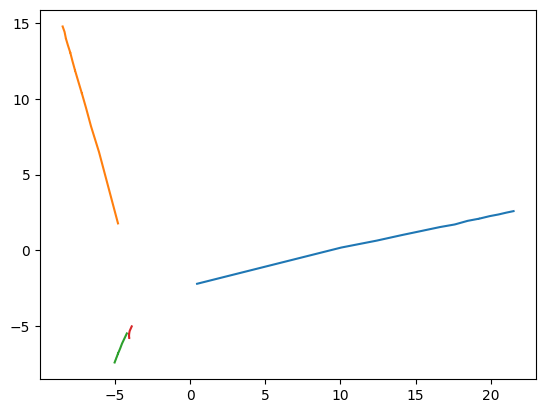

In [47]:
from matplotlib import pyplot as plt

plt.plot(reduced_weights[0][:,0],reduced_weights[0][:,1])
plt.plot(reduced_weights[1][:,0],reduced_weights[1][:,1])
plt.plot(reduced_weights[2][:,0],reduced_weights[2][:,1])
plt.plot(reduced_weights[3][:,0],reduced_weights[3][:,1])

plt.show()

In [ ]:

reduced_weights = []
_min_w = 99999999
_max_w = 0
#for i, w in enumerate(loaded_weights_np):
for i, w in enumerate(reversed(loaded_weights_np)):
    #if i == 0:
    #    reduced_weights.append(pca.fit(w))

    reduced_weights.append(pca.transform(w))

    _min = np.min(reduced_weights[-1])
    _max = np.max(reduced_weights[-1])

    if _min < _min_w:
        _min_w = _min
    if _max > _max_w:
        _max_w = _max 


_min_w = _min_w -1
_max_w = _max_w +1

if path_grid_losses is None and path_grid_xx is None and path_grid_yy is None:
    grid_range_x = np.linspace(_min_w, _max_w, grid_size)
    grid_range_y = np.linspace(_min_w, _max_w, grid_size)

    xx, yy = np.meshgrid(grid_range_x, grid_range_y)

    grid_points = np.column_stack((xx.ravel(), yy.ravel()))
    grid_weights = pca.inverse_transform(grid_points)

for i, rw in enumerate(reduced_weights):
    #if i != 0:
        #loaded_weights_np[i] = pca.inverse_transform(rw)
    loaded_weights_np[i] = pca.inverse_transform(rw)

loader = create_testloader(classic_model, batch_size)
if "alt_model" in classic_model:
    model = _get_model(classic_model, LOSS_FUNC, alt_model=True)
else:
    model = _get_model(classic_model, LOSS_FUNC, alt_model=False)

model.load_state_dict(torch.load(classic_model))
model.eval()

# Grid training
if path_grid_losses is None and path_grid_xx is None and path_grid_yy is None:


    grid_losses = []

    progress_bar = tqdm(
        total=len(grid_weights),
        desc="Computing loss of grid weights",
        unit="model_weights",
    )

    with torch.no_grad():
        for weights in grid_weights:
            model = set_weights(model, weights)

            running_loss = 0.0
            for inputs, labels in loader:
                outputs = model(inputs)
                loss = LOSS_FUNC(outputs, labels)
                running_loss += loss.item() * inputs.size(0)

            grid_losses.append(running_loss / len(loader.dataset))
            progress_bar.update(1)
            progress_bar.set_postfix(grid_loss=grid_losses[-1])

    progress_bar.close()

    grid_losses = np.array(grid_losses).reshape(grid_size, grid_size)

    if grid_save:

        model_filename = os.path.basename(classic_model)
        model_basename, _ = os.path.splitext(model_filename)

        if len(subfolder) > 0:
            if not os.path.exists(subfolder):
                os.makedirs(subfolder)

        np.save(f"{model_basename}_grid_losses.npy", grid_losses)
        np.save(f"{model_basename}_grid_xx.npy", xx)
        np.save(f"{model_basename}_grid_yy.npy", yy)
        print(f"Saved grid losses to: {f'{model_basename}_grid_losses.npy'}")
        print(f"Saved grid xx to: {f'{model_basename}_grid_xx.npy'}")
        print(f"Saved grid yy to: {f'{model_basename}_grid_yy.npy'}")
else:
    xx = np.load(path_grid_xx)
    yy = np.load(path_grid_yy)
    grid_losses = np.load(path_grid_losses)
    print("Loadded grid_losses, grid_xx and grid_yy")

# trajectories evaluationa
trajectories_loss_reevaluted = []
for w in loaded_weights_np:
    trajectory_loss_reevaluted = []
    progress_bar2 = tqdm(
        total=len(w),
        desc="Computing loss of trajectory weights",
        unit="model_weights",
    )

    with torch.no_grad():
        for weights in w:
            model = set_weights(model, weights)

            running_loss = 0.0
            for inputs, labels in loader:
                outputs = model(inputs)
                loss = LOSS_FUNC(outputs, labels)
                running_loss += loss.item() * inputs.size(0)

            trajectory_loss_reevaluted.append(running_loss / len(loader.dataset))
            progress_bar2.update(1)
            progress_bar2.set_postfix(trajectory_loss=trajectory_loss_reevaluted[-1])

    progress_bar2.close()
    trajectories_loss_reevaluted.append(trajectory_loss_reevaluted)

In [ ]:




surface = go.Surface(
    x=xx,
    y=yy,
    z=grid_losses,
    opacity=0.8,
    name="grid point",
    coloraxis="coloraxis",
    colorscale="Viridis",
)

trajectory_names = [
    #"Classic SGD m=0.0",
    "Async SGD m=0.0",
    "Async SGD m=0.50",
    "Async SGD m=0.90",
    "Async SGD m=0.95",
    #"Async SGD m=0.99",
    #"Async ADAM",
]
trajectory_names = trajectory_names[::-1] #uncomment if you reversed above
trajectory_colors = ['orange', 'green', 'blue', 'yellow', 'purple', 'cyan', 'magenta']  # Define more colors if you have more trajectories
trajectories = []
for i, (rw, tl) in enumerate(zip(reduced_weights, trajectories_loss_reevaluted)):
    traj = go.Scatter3d(
        x=rw[:, 0],
        y=rw[:, 1],
        z=tl,
        mode="markers+lines",
        line=dict(color=trajectory_colors[i % len(trajectory_colors)]),
        marker=dict(color=trajectory_colors[i % len(trajectory_colors)], size=5),
        name=trajectory_names[i],
    )
    trajectories.append(traj)

layout = go.Layout(
    scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title=" Loss", zaxis=dict(type='log')),
    coloraxis=dict(colorbar=dict(title="Loss magnitude"), 
                   colorscale="Viridis",
                   cmin=np.log10(grid_losses.min()),  
                    cmax=np.log10(grid_losses.max()),
    ),
)   

fig = go.Figure(data=[surface]+ trajectories, layout=layout)

fig.data[0].update(contours_z=dict(show=True, usecolormap=True,
                              highlightcolor="limegreen", project_z=True))

_min_x, _min_y = np.unravel_index(np.argmin(grid_losses), grid_losses.shape)
min_point = go.Scatter3d(
    x=[xx[_min_x, _min_y]],
    y=[yy[_min_x, _min_y]],
    z=[grid_losses[_min_x, _min_y]],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
    ),
    name="global minimum"
)

fig.add_trace(min_point)

fig.update_layout(legend=dict(orientation="v", x=0, y=0.5))


fig2 = go.Figure(data=[go.Contour(x=xx.flatten(), y=yy.flatten(), z=np.log10(grid_losses.flatten()), colorscale='Viridis')])

trajectories = []
for i, rw in enumerate(reduced_weights):
    traj = go.Scatter(
        x=rw[:, 0],  # x-axis
        y=rw[:, 1],  # y-axis
        mode="markers+lines",
        line=dict(color=trajectory_colors[i % len(trajectory_colors)]),
        marker=dict(color=trajectory_colors[i % len(trajectory_colors)], size=5),
        name=trajectory_names[i],
    )
    trajectories.append(traj)

for traj in trajectories:
    fig2.add_trace(traj)

fig2.update_layout(
    title='Contour Plot with trajectories Projection',
    xaxis_title='X',
    yaxis_title='Y',
    legend=dict(orientation="v", x=0, y=0.5)
)

